In [1]:
%matplotlib notebook

In [65]:
import os
import json

import numpy as np

from matplotlib import pyplot as plt

In [68]:
def read_feature_result(path):
    def func():
        with open(path) as f:
            for line in f:
                if not line.startswith('JSON-RESULT='):
                    continue
                data = json.loads(line.split('=', 1)[1])
                yield data
    records = list(func())
    return records

In [66]:
token_types = [
'comment',
'string',
'newline',
'number',
'indent',
'dedent',
'encoding',
'endmarker',
'errortoken',
'nl',
'name',
'op',
]

In [69]:
path_nofeatures = '/Users/adrozdov/School/amir-security/code-authorship/experiments/results/nofeature.txt'
path_onlyfeatures = '/Users/adrozdov/School/amir-security/code-authorship/experiments/results/onlyfeature.txt'

# Ablation (All features except 1 or 2)

In [70]:
records = read_feature_result(path_nofeatures)

In [71]:
# Build no-grid.

no_grid = {}

for i1, tt1 in enumerate(token_types):
    for i2, tt2 in enumerate(token_types):
        
        key = (tt1, tt2)
        
        # Get relevant records.
        relevant_records = []
        for x in records:
            keep = True
            
            # Ignore other (tt1, tt2) instances.
            for tt3 in token_types:
                flagname = 'no{}'.format(tt3)
                flagval = True if tt3 in (tt1, tt2) else False
                if x['flags'][flagname] != flagval:
                    keep = False
                    break
                    
            # Ignore `only` instances.
            for tt3 in token_types:
                flagname = 'only{}'.format(tt3)
                flagval = False
                if x['flags'][flagname] != flagval:
                    keep = False
                    break 
            
            if keep:
                relevant_records.append(x)
                
        # There should be at most 2 of each type of experiment. Keep the first.
        
        if len(relevant_records) == 2:
            relevant_records = relevant_records[:1]

        # Assert.
        
        if len(relevant_records) != 1:
            for x in relevant_records:
                print(x)
            raise Exception('Did not find correct number of records. length={}, tt1={}, tt2={}'.format(
                len(relevant_records), tt1, tt2))
            
        # Save to the grid.
        
        no_grid[key] = relevant_records[0]


<IPython.core.display.Javascript object>


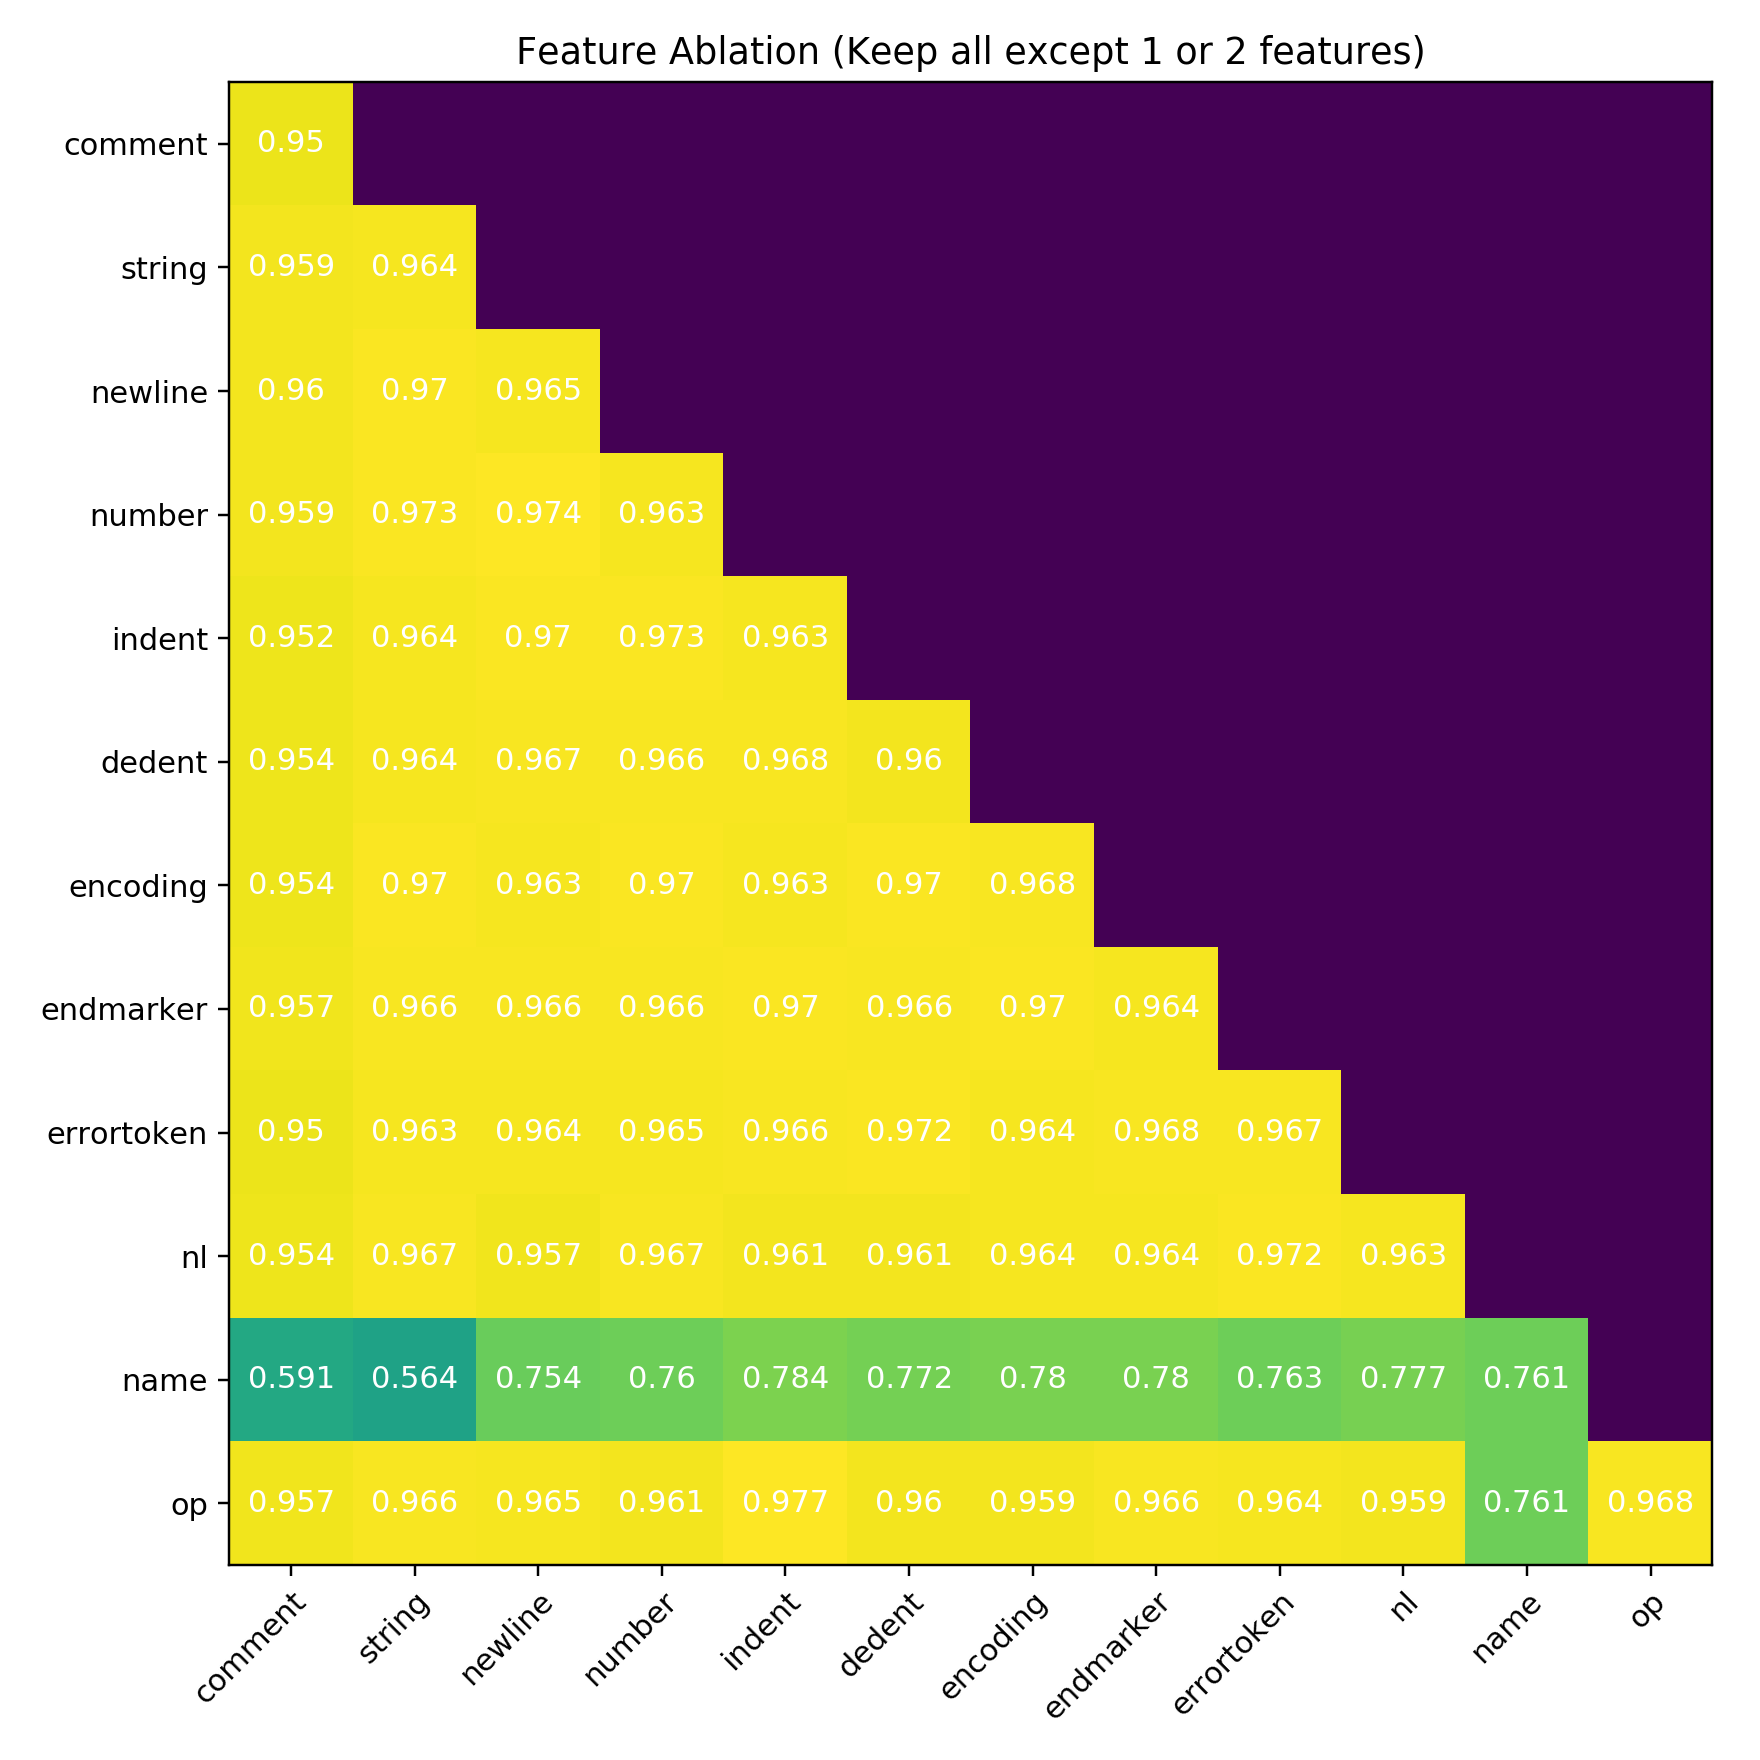

In [77]:
N = len(token_types)

accuracy = np.zeros((N, N))

for i1, tt1 in enumerate(token_types):
    for i2, tt2 in enumerate(token_types):
        if i1 >= i2:
            accuracy[i1, i2] = round(no_grid[(tt1, tt2)]['average_acc'], 3)

fig = plt.figure(figsize=(8, 8))

# Heatmap.
plt.imshow(accuracy)

# Accuracy.
for i in range(N):
    for j in range(N):
        if i >= j:
            text = plt.text(j, i, accuracy[i, j],
                           ha="center", va="center", color="w")

        
# ---- Aesthetics ---- #

ax = fig.get_axes()[0]

# We want to show all ticks...
ax.set_xticks(np.arange(N))
ax.set_yticks(np.arange(N))
# ... and label them with the respective list entries
ax.set_xticklabels(token_types)
ax.set_yticklabels(token_types)
        
# Rotate the tick labels and set their alignment.
plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
         rotation_mode="anchor")

plt.title('Feature Ablation (Keep all except 1 or 2 features)')

plt.tight_layout()

plt.show()

# Ablation (Only using 1 or 2 features)

In [92]:
records = read_feature_result(path_onlyfeatures)

In [93]:
# Build only-grid.

only_grid = {}
skipped = 0

for i1, tt1 in enumerate(token_types):
    for i2, tt2 in enumerate(token_types):
        
        if i1 < i2:
            continue
        
        key = (tt1, tt2)
        
        # Get relevant records.
        relevant_records = []
        for x in records:
            keep = True
            
            # Ignore other (tt1, tt2) instances.
            for tt3 in token_types:
                flagname = 'only{}'.format(tt3)
                flagval = True if tt3 in (tt1, tt2) else False
                if x['flags'][flagname] != flagval:
                    keep = False
                    break
            
            if keep:
                relevant_records.append(x)
                
        # There should be at most 2 of each type of experiment. Keep the first.
        
        if len(relevant_records) == 2:
            relevant_records = relevant_records[:1]

        # Assert.
        
        if len(relevant_records) != 1:
            for x in relevant_records:
                print(x)
            msg = 'Did not find correct number of records. length={}, tt1={}, tt2={}'.format(
                len(relevant_records), tt1, tt2)
            print(msg)
            skipped += 1
            continue
#             raise Exception(msg)
            
        # Save to the grid.
        
        only_grid[key] = relevant_records[0]

print('skipped', skipped)

Did not find correct number of records. length=0, tt1=newline, tt2=newline
Did not find correct number of records. length=0, tt1=indent, tt2=newline
Did not find correct number of records. length=0, tt1=dedent, tt2=newline
Did not find correct number of records. length=0, tt1=dedent, tt2=indent
Did not find correct number of records. length=0, tt1=endmarker, tt2=newline
Did not find correct number of records. length=0, tt1=endmarker, tt2=indent
Did not find correct number of records. length=0, tt1=endmarker, tt2=dedent
Did not find correct number of records. length=0, tt1=errortoken, tt2=newline
Did not find correct number of records. length=0, tt1=nl, tt2=newline
Did not find correct number of records. length=0, tt1=op, tt2=newline
Did not find correct number of records. length=0, tt1=op, tt2=indent
Did not find correct number of records. length=0, tt1=op, tt2=dedent
Did not find correct number of records. length=0, tt1=op, tt2=endmarker
skipped 13


<IPython.core.display.Javascript object>


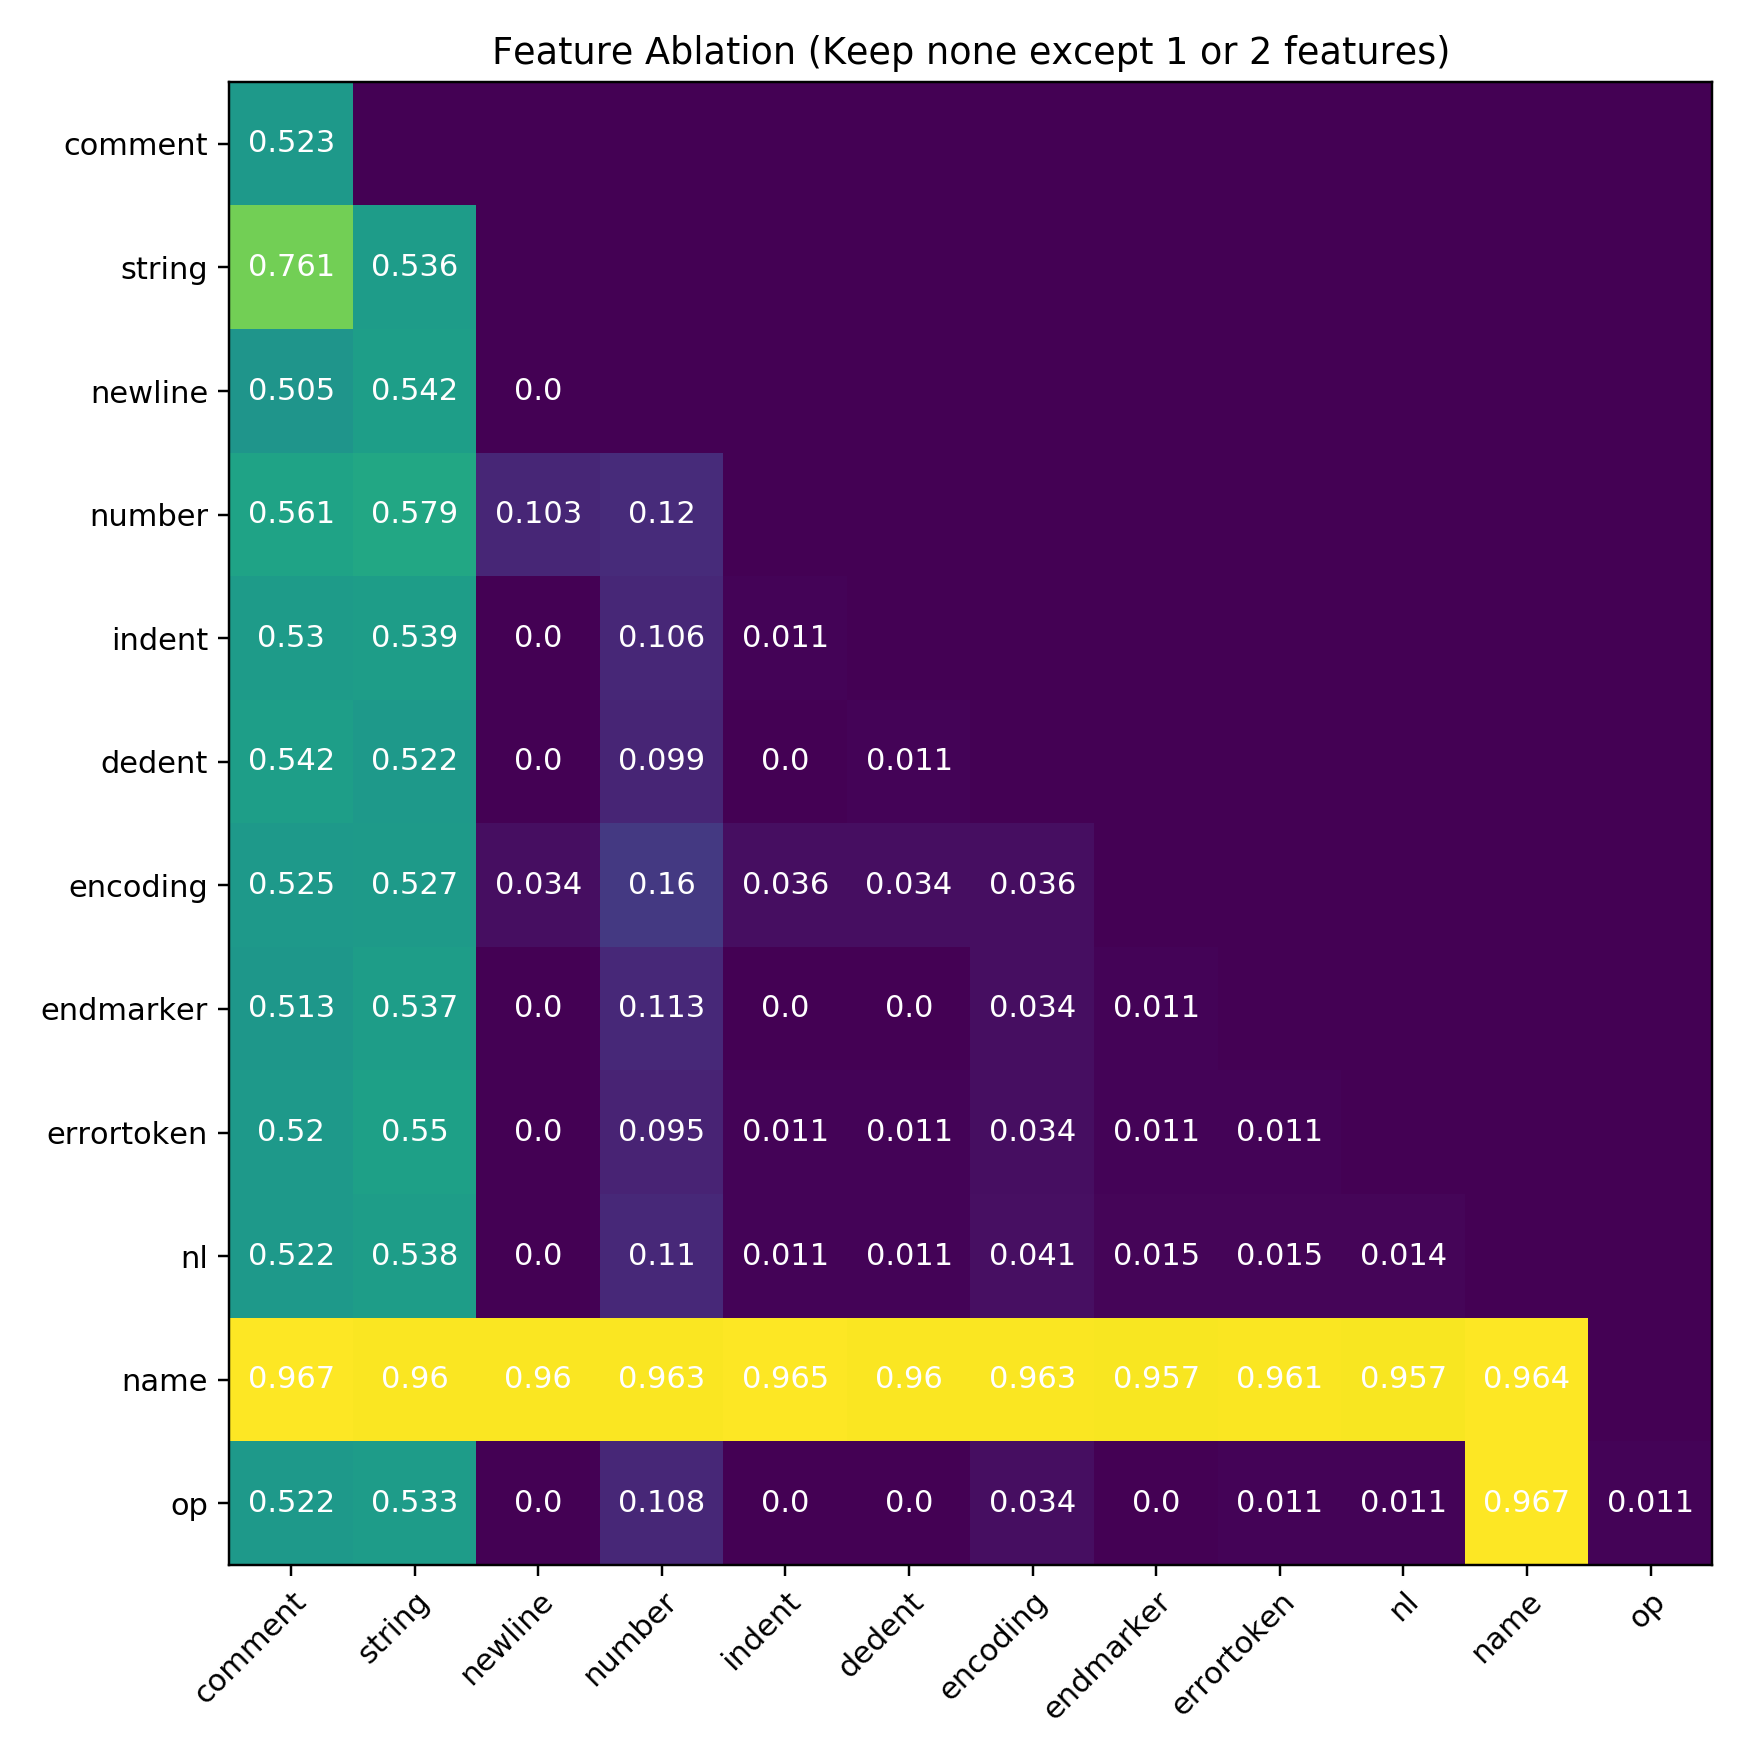

In [94]:
N = len(token_types)

accuracy = np.zeros((N, N))

for i1, tt1 in enumerate(token_types):
    for i2, tt2 in enumerate(token_types):
        if i1 < i2:
            continue
        if (tt1, tt2) in only_grid:
            accuracy[i1, i2] = round(only_grid[(tt1, tt2)]['average_acc'], 3)

fig = plt.figure(figsize=(8, 8))

# Heatmap.
plt.imshow(accuracy)

# Accuracy.
for i in range(N):
    for j in range(N):
        if i < j:
            continue
        text = plt.text(j, i, accuracy[i, j],
                       ha="center", va="center", color="w")

        
# ---- Aesthetics ---- #

ax = fig.get_axes()[0]

# We want to show all ticks...
ax.set_xticks(np.arange(N))
ax.set_yticks(np.arange(N))
# ... and label them with the respective list entries
ax.set_xticklabels(token_types)
ax.set_yticklabels(token_types)
        
# Rotate the tick labels and set their alignment.
plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
         rotation_mode="anchor")

plt.title('Feature Ablation (Keep none except 1 or 2 features)')

plt.tight_layout()

plt.show()